In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten,Dropout
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Input, Activation, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
import pickle 
from PIL import Image
import os
import cv2
import math
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import random
import json
%matplotlib inline



Using TensorFlow backend.


In [3]:
#########first is load data##############
data = pd.read_csv('driving_log.csv', names=['center', 'left', 'right', 'centerval', 'leftval', 'rightval', 'speedval'] )
####display data
framedata = pd.DataFrame(data)
framedata.head()

,center,left,right,centerval,leftval,rightval,speedval
0,D:\U机器学习\selfcar\simulator-windows-64\IMG\cent...,D:\U机器学习\selfcar\simulator-windows-64\IMG\lef...,D:\U机器学习\selfcar\simulator-windows-64\IMG\rig...,0.0,0.0,0.0,0.000078
1,D:\U机器学习\selfcar\simulator-windows-64\IMG\cent...,D:\U机器学习\selfcar\simulator-windows-64\IMG\lef...,D:\U机器学习\selfcar\simulator-windows-64\IMG\rig...,0.0,0.0,0.0,0.000078
2,D:\U机器学习\selfcar\simulator-windows-64\IMG\cent...,D:\U机器学习\selfcar\simulator-windows-64\IMG\lef...,D:\U机器学习\selfcar\simulator-windows-64\IMG\rig...,0.0,0.0,0.0,0.000080
3,D:\U机器学习\selfcar\simulator-windows-64\IMG\cent...,D:\U机器学习\selfcar\simulator-windows-64\IMG\lef...,D:\U机器学习\selfcar\simulator-windows-64\IMG\rig...,0.0,0.0,0.0,0.000080
4,D:\U机器学习\selfcar\simulator-windows-64\IMG\cent...,D:\U机器学习\selfcar\simulator-windows-64\IMG\lef...,D:\U机器学习\selfcar\simulator-windows-64\IMG\rig...,0.0,0.0,0.0,0.000081


In [4]:
###############process data to train data #############
x_train =[]
y_train =[]

for row in data['center'].values:
    x_train.append(row.strip())
    
for row in data['centerval'].values:
    y_train.append(row)
    

x_train =np.array(x_train)
y_train =np.array(y_train)

print(x_train.shape[0])
print(str(len(x_train))+"== "+str( len(y_train)))

16168
16168== 16168


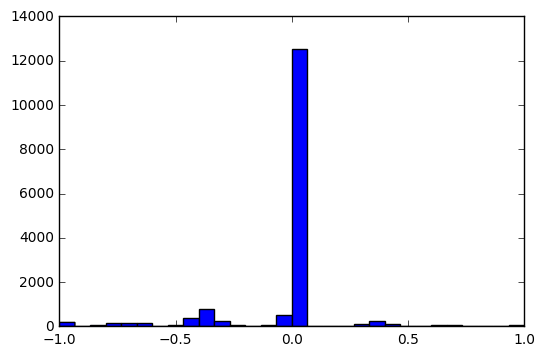

In [5]:
###############look y_train##############
plt.hist(y_train,30)
plt.show()

In [6]:
#########read img #############
img_width = 66
img_height = 200
x_train_processed =[]

for i in range(len(x_train)):
    img = Image.open(x_train[i])
    img = img.convert('RGB')
    img = img.resize((img_height,img_width ))
    x_train_processed.append(img)

In [7]:
x_train_processed_image=np.zeros((len(x_train_processed),img_width,img_height,3))
index=0
for img in x_train_processed:
    x_train_processed_image[index] =img
    index+=1


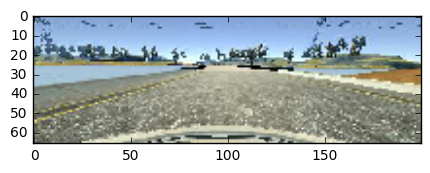

In [8]:
###################display one imgs #####################
import random
%matplotlib inline

index = random.randint(0,len(x_train_processed))
image = x_train_processed[index]
plt.figure(figsize=(5,5))
plt.imshow(image)


In [9]:
#################create cnn network ########################
def lenetNetwork():
    model = Sequential()
    model.add(Convolution2D(32,3,3,input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5)) 
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

def alexnetNetwork():
    model = Sequential()
    return model

def vggNetwork():
    model = Sequential()
    return model

def googlenetNetwork():
    model = Sequential()
    return model

def end_to_end_network():
    model = Sequential()
    dropout=0.5

    #lay1
    model.add(Conv2D(24,5,5,input_shape=(img_width ,img_height,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay2
    model.add(Conv2D(36,5,5))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay3
    model.add(Conv2D(48,5,5))
    model.add(MaxPooling2D((2,2),border_mode='same'))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay4
    model.add(Conv2D(64,3,3))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))
    #lay5
    model.add(Conv2D(64,3,3))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #flatten
    model.add(Flatten())

    #fullconnected1
    model.add(Dense(1164,activation='relu'))
    model.add(Dropout(dropout))

    #fullconnected2
    model.add(Dense(100,activation='relu'))

    #fullconnected3
    model.add(Dense(50,activation='relu'))

    #fullconnected4
    model.add(Dense(10,activation='relu'))

    #fullconnected5
    model.add(Dense(1))

    return model

In [10]:
########### test###################
    
batch_szie =512
np_epochs = 10
model_file ='model.json'
verbose=2
validation_split=0.1
shuffle=False

model = end_to_end_network()


adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam,loss='mean_squared_error',metrics=['accuracy'])

history=model.fit(x_train_processed_image,y_train,batch_size=batch_szie,nb_epoch=np_epochs,verbose=verbose,validation_split=validation_split,shuffle=shuffle)



Train on 14551 samples, validate on 1617 samples
Epoch 1/10
299s - loss: 0.2326 - acc: 0.6088 - val_loss: 0.0615 - val_acc: 0.7539
Epoch 2/10
299s - loss: 0.1001 - acc: 0.7446 - val_loss: 0.0617 - val_acc: 0.7539
Epoch 3/10
300s - loss: 0.0798 - acc: 0.7641 - val_loss: 0.0617 - val_acc: 0.7539
Epoch 4/10
300s - loss: 0.0720 - acc: 0.7669 - val_loss: 0.0617 - val_acc: 0.7539
Epoch 5/10
300s - loss: 0.0671 - acc: 0.7672 - val_loss: 0.0617 - val_acc: 0.7539
Epoch 6/10
301s - loss: 0.0645 - acc: 0.7677 - val_loss: 0.0616 - val_acc: 0.7539
Epoch 7/10
301s - loss: 0.0618 - acc: 0.7676 - val_loss: 0.0616 - val_acc: 0.7539
Epoch 8/10
301s - loss: 0.0612 - acc: 0.7676 - val_loss: 0.0616 - val_acc: 0.7539
Epoch 9/10
301s - loss: 0.0599 - acc: 0.7678 - val_loss: 0.0616 - val_acc: 0.7539
Epoch 10/10
300s - loss: 0.0594 - acc: 0.7678 - val_loss: 0.0616 - val_acc: 0.7539


In [11]:

with open('model.json', 'w') as fd:
    json.dump(model.to_json(), fd)
    
model.save_weights('model.h5')

In [12]:
from keras.models import model_from_json


loaded_model = model_from_json(json_string)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

NameError: name 'json_string' is not defined

In [ ]:

#model.compile(loss='mean_squared_error', optimizer='adam')
#generator = generate_batch(x_train_processed_image, y_train)
#model.fit_generator(generator, samples_per_epoch = len(y_train), nb_epoch = 10, verbose=2)